In [92]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler

In [2]:
ds1 = read_csv("stocknet_trn_data_upd.csv")

In [3]:
ds1

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [4]:
d2 = read_csv("stocknet_trn_data_targets_upd.csv")

In [5]:
d2

,d1,75.650002
0,d2,124.449997
1,d3,82.660004
2,d4,57.009998
3,d5,47.860001
4,d6,106.070000
...,...,...
97726,d97728,103.230003
97727,d97729,64.620003
97728,d97730,575.140015
97729,d97731,115.400002


In [6]:
d2.loc[-1] = ["d1", 75.650002]  # adding a row
d2.index = d2.index + 1  # shifting index
d2 = d2.sort_index()  # sorting by index

d2.columns = ['label', 'close']

In [7]:
d2

,label,close
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001
...,...,...
97727,d97728,103.230003
97728,d97729,64.620003
97729,d97730,575.140015
97730,d97731,115.400002


In [8]:
extract_col = d2["close"] 

In [9]:
dataset = ds1.join(extract_col)
dataset

,Open,High,Low,Volume,close
0,75.430000,75.910004,75.139999,3436700.0,75.650002
1,124.930000,124.940002,124.169998,2366700.0,124.449997
2,84.339996,84.370003,82.370003,11338700.0,82.660004
3,56.770000,57.150002,56.529999,413300.0,57.009998
4,47.419998,48.090000,46.759998,9531100.0,47.860001
...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,115.400002


## Data Analysis and Visualization

In [10]:
dataset.shape

(97732, 5)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97732 entries, 0 to 97731
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97729 non-null  float64
 1   High    97729 non-null  float64
 2   Low     97729 non-null  float64
 3   Volume  97729 non-null  float64
 4   close   97729 non-null  float64
dtypes: float64(5)
memory usage: 3.7 MB


In [12]:
dataset.describe()

,Open,High,Low,Volume,close
count,97729.000000,97729.000000,97729.000000,9.772900e+04,97729.000000
mean,2427.661341,2439.557429,2413.965223,9.064781e+06,2427.381769
std,21797.841949,21900.340643,21678.006665,1.800910e+07,21794.748626
min,2.130000,2.280000,1.960000,0.000000e+00,2.020000
25%,40.450001,40.730000,40.180000,1.198000e+06,40.459999
50%,65.959999,66.489998,65.459999,3.544600e+06,66.010002
75%,97.669998,98.470001,96.930000,8.996400e+06,97.669998
max,272800.000000,272885.000000,271040.000000,6.166205e+08,271062.000000


<AxesSubplot:>

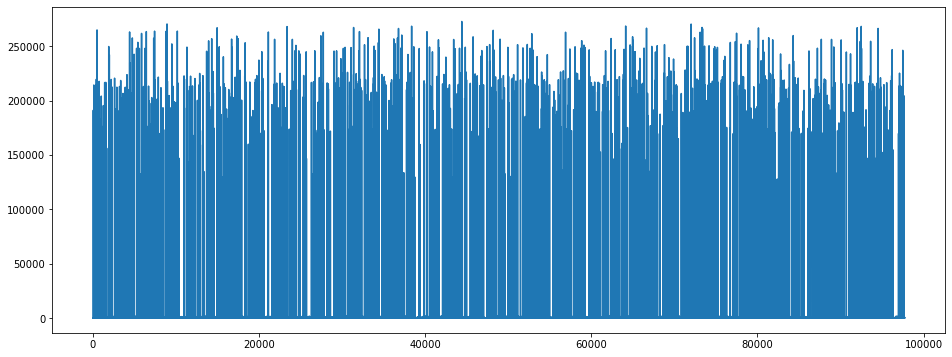

In [13]:
dataset['Open'].plot(figsize=(16,6))

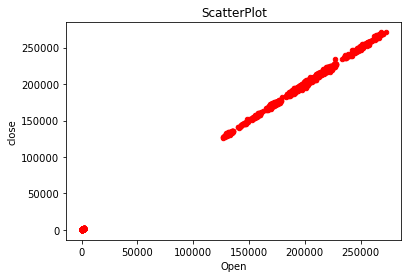

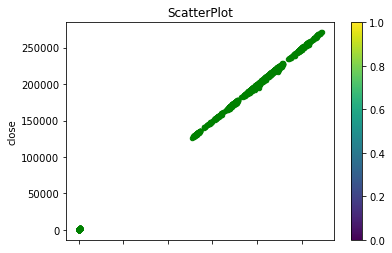

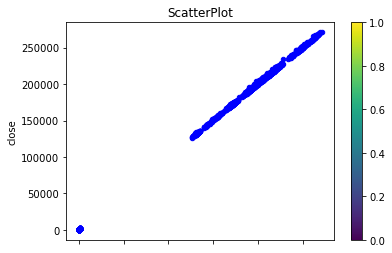

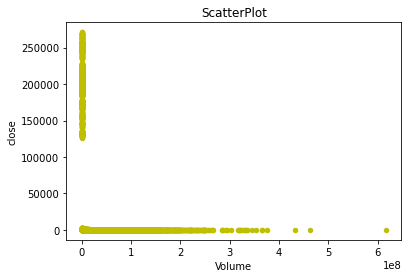

In [14]:
colors = (['red', 'green'])
dataset.plot(kind = 'scatter',
        x = 'Open',
        y = 'close',
         c = 'r', cmap=matplotlib.colors.ListedColormap(colors))
  
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()

colors = (['red', 'green'])
dataset.plot(kind = 'scatter',
        x = 'High',
        y = 'close',
         c = 'g', cmap=matplotlib.colors.ListedColormap(colors))
  
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()

colors = (['red', 'green'])
dataset.plot(kind = 'scatter',
        x = 'Low',
        y = 'close',
         c = 'b', cmap=matplotlib.colors.ListedColormap(colors))
  
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()

colors = (['red', 'green'])
dataset.plot(kind = 'scatter',
        x = 'Volume',
        y = 'close',
         c = 'y', cmap=matplotlib.colors.ListedColormap(colors))
  
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()

## Data Preprocessing

### Checking for NAN values

In [15]:
dataset.isnull().sum()

Open      3
High      3
Low       3
Volume    3
close     3
dtype: int64

In [16]:
dataset.isnull().sum().sum()

15

In [17]:
d2.isnull().sum()

label    0
close    3
dtype: int64

### Replacing NAN values with mean

In [18]:
mean_value_Open = dataset['Open'].mean()

In [19]:
dataset['Open'].fillna(value=mean_value_Open, inplace=True)

In [20]:
mean_value_High = dataset['High'].mean()

In [21]:
dataset['High'].fillna(value=mean_value_High, inplace=True)

In [22]:
mean_value_Low = dataset['Low'].mean()

In [23]:
dataset['Low'].fillna(value=mean_value_Low, inplace=True)

In [24]:
mean_value_Volume = dataset['Volume'].mean()

In [25]:
dataset['Volume'].fillna(value=mean_value_Volume, inplace=True)

In [26]:
mean_value_7 = dataset['close'].mean()

In [27]:
dataset['close'].fillna(value=mean_value_7, inplace=True)

In [28]:
dataset.isnull().sum()

Open      0
High      0
Low       0
Volume    0
close     0
dtype: int64

### Feature Engineering

In [29]:
data_sample = dataset.sample(frac=0.1, random_state=123)

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

In [31]:
X = data_sample.loc[:, dataset.columns != 'close']

model.fit(X,data_sample['close'])

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.28305092 0.40700273 0.30933056 0.00061579]


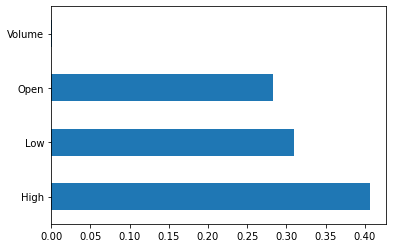

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#plot for top 10 features
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [34]:
corelation = dataset.corr()
corelation

,Open,High,Low,Volume,close
Open,1.000000,0.999988,0.999988,-0.054682,0.999974
High,0.999988,1.000000,0.999987,-0.054687,0.999989
Low,0.999988,0.999987,1.000000,-0.054680,0.999988
Volume,-0.054682,-0.054687,-0.054680,1.000000,-0.054684
close,0.999974,0.999989,0.999988,-0.054684,1.000000


<AxesSubplot:>

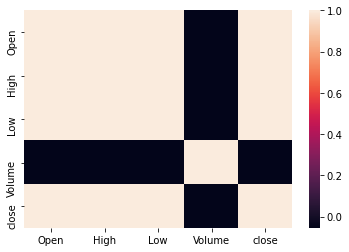

In [35]:
sns.heatmap(corelation)

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = dataset[["Open", "High", "Low"]]
Y = dataset[["close"]]

In [38]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = .30, random_state = 13)

In [39]:
X_train.shape

(68412, 3)

In [40]:
Y_train.shape

(68412, 1)

In [41]:
X_val.shape

(29320, 3)

#### Test Set

In [42]:
df2 = read_csv("stocknet_tst_data_upd.csv")
del df2['Volume']
df2

,Open,High,Low
0,26.299999,26.520000,25.959999
1,95.550003,95.739998,94.019997
2,54.770000,55.360001,54.590000
3,125.589996,125.820000,123.660004
4,20.709999,20.809999,20.670000
...,...,...,...
10855,51.660000,52.919998,49.919998
10856,39.549999,40.619999,39.189999
10857,22.780001,22.900000,22.389999
10858,33.750000,34.060001,33.580002


## Model Training

### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
estimator_1 = LinearRegression()

In [45]:
estimator_1.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [46]:
param_grid = {  'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'positive' : [True, False]}

lin_reg = LinearRegression()

g_search_lin_reg = GridSearchCV(estimator = lin_reg, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

g_search_lin_reg.fit(X_train, Y_train);

In [47]:
print(g_search_lin_reg.best_params_)
tuned_lin_ser = g_search_lin_reg.best_estimator_
print(g_search_lin_reg.best_estimator_.score(X_val,Y_val))

{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': False}
0.9999908903953924


In [48]:
a = tuned_lin_ser.predict(X_val)

In [49]:
mean_squared_error(Y_val, a)

4309.08747450646

### Random Forest

In [50]:
# Identify Model
from sklearn.ensemble import RandomForestRegressor

In [51]:
estimator_2 = RandomForestRegressor()

In [52]:
estimator_2.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [53]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

g_search.fit(X_train, Y_train);

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed

In [54]:
print(g_search.best_params_)
tuned_reg = g_search.best_estimator_
print(g_search.best_estimator_.score(X_val,Y_val))

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}
0.9999794354931739


In [55]:
b = tuned_reg.predict(X_val)

In [56]:
mean_squared_error(Y_val, b)

9727.563665025737

### KNN

In [57]:
#importing libraries
from sklearn.neighbors import KNeighborsRegressor

In [58]:
estimator = KNeighborsRegressor()

In [59]:
estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [78]:
param_grid = {  'weights': ['uniform', 'distance'], 'n_neighbors': [2, 4, 5, 7, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'leaf_size' : [20, 30, 50]}

knn_reg = KNeighborsRegressor()

g_search_knn_reg = GridSearchCV(estimator = knn_reg, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

g_search_knn_reg.fit(X_train, Y_train);


In [79]:
print(g_search_knn_reg.best_params_)
tuned_knn_reg = g_search_knn_reg.best_estimator_
print(g_search_knn_reg.best_estimator_.score(X_val,Y_val))

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 4, 'weights': 'distance'}
0.9999803686248427


In [80]:
c = tuned_knn_reg.predict(X_val)

In [81]:
mean_squared_error(Y_val, c)

9286.167341103812

### Support Vector Regressor

In [64]:
from sklearn.svm import SVR

In [65]:
svr_1 = SVR()
model = svr_1.fit(X_train, Y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [66]:
d = model.predict(X_val)

In [67]:
mean_squared_error(Y_val, d)

473783267.5499485

In [68]:
estimator_2 = SVR()

In [69]:
estimator_2.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [70]:
param_grid = {  'kernel': ['rbf'], 'gamma': ['scale'], 'shrinking': [True], 'C' : [1.0]}

svr = SVR()

g_search_knn_reg = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 2, verbose = 0, return_train_score=True)

g_search_knn_reg.fit(X_train, Y_train);


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [71]:
print(g_search_knn_reg.best_params_)
tuned_knn_reg = g_search_knn_reg.best_estimator_
print(g_search_lin_reg.best_estimator_.score(X_val,Y_val))

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
0.9999908903953924


In [72]:
c = tuned_knn_reg.predict(X_val)

In [73]:
mean_squared_error(Y_val, c)

473783267.5499485

In [74]:
svr_2 = SVR()

In [75]:
param_grid = {  'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'shrinking': [True, False], 'C' : [0.5, 1.0]}

svr_2 = SVR()

g_search_svr_reg = GridSearchCV(estimator = svr_2, param_grid = param_grid, cv = 2, verbose = 0, return_train_score=True)

g_search_svr_reg.fit(X_train, Y_train);


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [82]:
print(g_search_svr_reg.best_params_)
tuned_svr_reg = g_search_svr_reg.best_estimator_
print(g_search_svr_reg.best_estimator_.score(X_val,Y_val))

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
-0.001599123391302859


In [84]:
d = tuned_svr_reg.predict(X_val)

In [85]:
mean_squared_error(Y_val, d)

473783267.5499485

### Normalization of Mean Squared Error

In [102]:
p = Y_val.mean()
p

close    2447.750281
dtype: float64

In [108]:
msr_LR = 4309.08747450646
msr_RF = 9727.563665025737
msr_KNN = 9286.167341103812
msr_SVR = 473783267.5499485
p1 = 2447.750281


nor_msr_LR = 4309.08747450646/2447.750281
nor_msr_RF = 9727.563665025737/2447.750281
nor_msr_KNN = 9286.167341103812/2447.750281
nor_msr_SVR = 473783267.5499485/2447.750281


In [110]:
nor_msr_LR = msr_LR/p1
nor_msr_RF = msr_RF/p1
nor_msr_KNN = msr_KNN/p1
nor_msr_SVR = msr_SVR/p1

In [111]:
print(nor_msr_LR)
print(nor_msr_RF)
print(nor_msr_KNN)
print(nor_msr_SVR)

1.7604277315192596
3.974083361580354
3.793756010645847
193558.661284839


#### From the above normalized values, we find that the normalized mean squared error is minimum for Fogistic Regression model. Hence, Linear Regression has the best performance.
#### We will use Linear Regression for our test dataset

##### Test dataset

In [117]:
df2

,Open,High,Low
0,26.299999,26.520000,25.959999
1,95.550003,95.739998,94.019997
2,54.770000,55.360001,54.590000
3,125.589996,125.820000,123.660004
4,20.709999,20.809999,20.670000
...,...,...,...
10855,51.660000,52.919998,49.919998
10856,39.549999,40.619999,39.189999
10857,22.780001,22.900000,22.389999
10858,33.750000,34.060001,33.580002


##### Running the Linear Regression model in test dataset

In [112]:
final_pred = tuned_lin_ser.predict(df2)

In [147]:
z = pd.DataFrame(final_pred)


In [148]:
# Import pandas library
import pandas as pd

# initialize list of lists
data=[]

for i in range(1,10861):
  data.append([i,'d'])

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age'])

df["column"] =df["Age"] + df["Name"].astype(str)
df

,Name,Age,column
0,1,d,d1
1,2,d,d2
2,3,d,d3
3,4,d,d4
4,5,d,d5
...,...,...,...
10855,10856,d,d10856
10856,10857,d,d10857
10857,10858,d,d10858
10858,10859,d,d10859


In [149]:
z.insert(0, '', df['column'], True)

In [151]:
z

,,0
0,d1,26.229608
1,d2,94.579777
2,d3,55.124358
3,d4,124.359178
4,d5,20.765000
...,...,...
10855,d10856,51.393971
10856,d10857,40.157044
10857,d10858,22.590508
10858,d10859,33.880805


In [154]:
z.to_csv('Ritik_targets.txt', header=None,index=None, sep=' ', mode='a')

In [155]:
z

,,0
0,d1,26.229608
1,d2,94.579777
2,d3,55.124358
3,d4,124.359178
4,d5,20.765000
...,...,...
10855,d10856,51.393971
10856,d10857,40.157044
10857,d10858,22.590508
10858,d10859,33.880805
